# Univariate analysis on 2 columns of my own dataset

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('steam.csv', sep=',')

In [4]:
df.pop('appid')
# Convert english too boolean
df['english'] = df['english'].astype('bool')
# set release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
# create 3 seperate platform fields instead of 1
df['windows'], df['mac'], df['linux'] = df['platforms'].apply(lambda x: 'windows' in x),df['platforms'].apply(lambda x: 'mac' in x),df['platforms'].apply(lambda x: 'linux' in x)
# Split owners categorical value in two numerical values
df['owners_low'] = df['owners'].apply(lambda x: x.split('-')[0]).astype('int')
df['owners_high'] = df['owners'].apply(lambda x: x.split('-')[1]).astype('int')
# Create int out of data column
df['release_year'] = df['release_date'].dt.year
genres = df['genres'].apply(lambda x: x.split(';')[0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              27075 non-null  object        
 1   release_date      27075 non-null  datetime64[ns]
 2   english           27075 non-null  bool          
 3   developer         27075 non-null  object        
 4   publisher         27075 non-null  object        
 5   platforms         27075 non-null  object        
 6   required_age      27075 non-null  int64         
 7   categories        27075 non-null  object        
 8   genres            27075 non-null  object        
 9   steamspy_tags     27075 non-null  object        
 10  achievements      27075 non-null  int64         
 11  positive_ratings  27075 non-null  int64         
 12  negative_ratings  27075 non-null  int64         
 13  average_playtime  27075 non-null  int64         
 14  median_playtime   2707

The median and owners filter are to make sure that games that nobody playes are excluded to get a more accurate representation of games

In [6]:
medianPlaytimeFilter = df['median_playtime']> 0.5
ownersFilter = df['owners_low'] > 20000 #lowest range above 0
noFreeGameFilter = df['price'] > 0.1
reviewFilter = df['positive_ratings'] > 5

Boxplot doesn't work, as a lot of games are free

<AxesSubplot:>

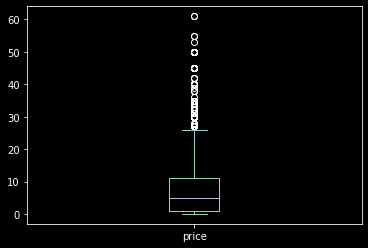

In [7]:
df['price'][ownersFilter][df['positive_ratings'] > 1][medianPlaytimeFilter].plot(kind='box')

Filter out the free games

C:\Users\Stijn\AppData\Local\Temp/ipykernel_7872/1341901083.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[noFreeGameFilter][ownersFilter][reviewFilter][medianPlaytimeFilter]['price'].plot(kind='box')


<AxesSubplot:>

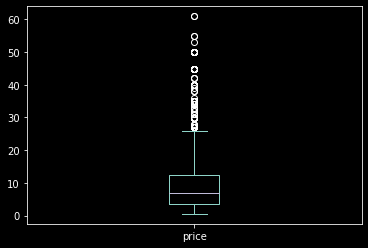

In [8]:

df[noFreeGameFilter][ownersFilter][reviewFilter][medianPlaytimeFilter]['price'].plot(kind='box')

# The most expensive games

In [9]:
df[medianPlaytimeFilter].sort_values('price',ascending=False).head(10)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,average_playtime,median_playtime,owners,price,windows,mac,linux,owners_low,owners_high,release_year
13061,GameMaker Studio 2 Web,2017-03-08,True,YoYo Games Ltd.,YoYo Games Ltd.,windows;mac,0,In-App Purchases,Animation & Modeling;Design & Illustration;Edu...,Game Development;Design & Illustration;Utilities,...,1889,1889,0-20000,114.99,True,True,False,0,20000,2017
5384,RPG Maker MV,2015-10-23,True,KADOKAWA;Yoji Ojima,Degica,windows;mac;linux,0,Steam Trading Cards;Partial Controller Support,Design & Illustration;Web Publishing,RPGMaker;Game Development;RPG,...,331,331,200000-500000,60.99,True,True,True,200000,500000,2015
3950,AppGameKit: Easy Game Development,2014-11-21,True,The Game Creators,The Game Creators,windows;mac;linux,0,Steam Workshop,Animation & Modeling;Design & Illustration;Edu...,Game Development;Software Training;Utilities,...,1,1,50000-100000,60.99,True,True,True,50000,100000,2014
2435,X-Plane 11,2017-03-30,True,Laminar Research,Laminar Research,windows;mac;linux,0,Single-player;Local Multi-Player;Partial Contr...,Simulation,Simulation;Flight;Realistic,...,44169,44169,100000-200000,54.99,True,True,True,100000,200000,2017
21371,WARRIORS OROCHI 4 - 無双OROCHI３,2018-10-15,True,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",windows,0,Single-player;Multi-player;Online Multi-Player...,Action,Action;Hack and Slash;Anime,...,1207,1207,50000-100000,54.99,True,False,False,50000,100000,2018
21571,DEAD OR ALIVE 6,2019-02-28,True,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",windows,0,Single-player;Multi-player;Online Multi-Player...,Action,Fighting;Action;Sexual Content,...,57,57,20000-50000,54.99,True,False,False,20000,50000,2019
1498,RPG Maker VX Ace,2012-12-10,True,KADOKAWA,Degica,windows,0,Steam Trading Cards;Steam Workshop,Design & Illustration;Web Publishing,Game Development;RPG;RPGMaker,...,405,465,500000-1000000,52.99,True,False,False,500000,1000000,2012
10029,ACE COMBAT™ 7: SKIES UNKNOWN,2019-01-31,True,BANDAI NAMCO Studios,BANDAI NAMCO Entertainment,windows,0,Single-player;Online Multi-Player;Steam Achiev...,Action;Simulation,Flight;Action;Story Rich,...,1029,1029,200000-500000,49.99,True,False,False,200000,500000,2019
10016,BERSERK and the Band of the Hawk,2017-02-21,True,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",windows,18,Single-player;Steam Achievements;Full controll...,Sexual Content;Nudity;Violent;Gore;Action,Anime;Action;Hack and Slash,...,78,78,20000-50000,49.99,True,False,False,20000,50000,2017
6785,ARSLAN: THE WARRIORS OF LEGEND,2016-02-09,True,"KOEI TECMO GAMES CO., LTD.","KOEI TECMO GAMES CO., LTD.",windows,0,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Action;Anime;Hack and Slash,...,68,68,0-20000,49.99,True,False,False,0,20000,2016


# Prices of games
(filtered out outliers and the games that nearly nobody owns/playes)

It seems there are many free games

C:\Users\Stijn\AppData\Local\Temp/ipykernel_7872/3573847891.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['price'] < 200][ownersFilter][medianPlaytimeFilter][reviewFilter]['price'].plot(kind='hist',bins=13)


<AxesSubplot:ylabel='Frequency'>

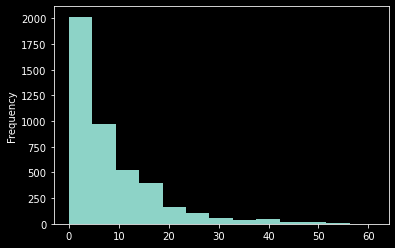

In [10]:
df[df['price'] < 200][ownersFilter][medianPlaytimeFilter][reviewFilter]['price'].plot(kind='hist',bins=13)

# Price of payed games

C:\Users\Stijn\AppData\Local\Temp/ipykernel_7872/791919376.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['price']> 0][df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].plot(kind='hist',bins=13)


<AxesSubplot:ylabel='Frequency'>

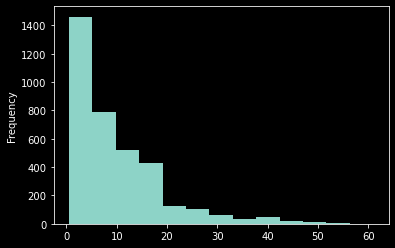

In [11]:
df[df['price']> 0][df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].plot(kind='hist',bins=13)

Seems there are also a lot of cheap games

# Number of paid and free games

In [12]:
df[noFreeGameFilter][df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].count() , df[df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].count()

C:\Users\Stijn\AppData\Local\Temp/ipykernel_7872/1283793119.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[noFreeGameFilter][df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].count() , df[df['price'] < 200][ownersFilter][medianPlaytimeFilter]['price'].count()


(3616, 4351)

# Games that are played the most hours (median)

In [13]:
df[ownersFilter][medianPlaytimeFilter][reviewFilter].sort_values('median_playtime',ascending=False).head(10)

C:\Users\Stijn\AppData\Local\Temp/ipykernel_7872/2057969152.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[ownersFilter][medianPlaytimeFilter][reviewFilter].sort_values('median_playtime',ascending=False).head(10)


,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,average_playtime,median_playtime,owners,price,windows,mac,linux,owners_low,owners_high,release_year
9201,The Abbey of Crime Extensum,2016-05-19,True,Manuel Pazos;Daniel Celemín,Manuel Pazos;Daniel Celemín,windows;mac;linux,0,Single-player,Adventure;Free to Play,Free to Play;Adventure;Retro,...,190625,190625,50000-100000,0.00,True,True,True,50000,100000,2016
1478,The Banner Saga: Factions,2013-02-25,True,Stoic,Versus Evil,windows;mac,0,Multi-player;Cross-Platform Multiplayer,Free to Play;Indie;RPG;Strategy,Free to Play;Strategy;RPG,...,95245,190489,200000-500000,0.00,True,True,False,200000,500000,2013
6014,The Secret of Tremendous Corporation,2015-10-12,True,Sebastian Krzyszkowiak;Konrad Burandt;Paweł Radej,dosowisko.net,windows;linux,0,Single-player;Captions available;Steam Cloud,Adventure;Casual;Free to Play;Indie,Free to Play;Adventure;Indie,...,95242,190445,100000-200000,0.00,True,False,True,100000,200000,2015
8969,PRICE,2016-09-15,True,YETU GAME,YETU GAME,windows,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Casual;Indie,Puzzle;Free to Play;Anime,...,63481,63490,200000-500000,0.00,True,False,False,200000,500000,2016
3969,Shroud of the Avatar: Forsaken Virtues,2018-03-27,True,Portalarium,Portalarium,windows;mac;linux,0,Single-player;Multi-player;MMO;Co-op;Cross-Pla...,Free to Play;Massively Multiplayer;RPG,RPG;Massively Multiplayer;Free to Play,...,54618,54618,50000-100000,0.00,True,True,True,50000,100000,2018
2435,X-Plane 11,2017-03-30,True,Laminar Research,Laminar Research,windows;mac;linux,0,Single-player;Local Multi-Player;Partial Contr...,Simulation,Simulation;Flight;Realistic,...,44169,44169,100000-200000,54.99,True,True,True,100000,200000,2017
12195,The Price of Freedom,2016-12-22,True,Construct Studio,Construct Studio Inc.,windows,0,Single-player,Adventure;Indie,Indie;Adventure;Story Rich,...,36029,36029,50000-100000,0.00,True,False,False,50000,100000,2016
8796,MANDAGON,2016-08-03,True,Blind Sky Studios,Blind Sky Studios,windows;mac,0,Single-player;Steam Achievements;Partial Contr...,Adventure;Free to Play;Indie,Free to Play;Pixel Graphics;Adventure,...,21233,31845,200000-500000,0.00,True,True,False,200000,500000,2016
2737,Heroine's Quest: The Herald of Ragnarok,2014-03-20,True,Crystal Shard,Crystal Shard,windows;linux,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Free to Play;Indie;RPG,Adventure;RPG;Point & Click,...,21247,31835,500000-1000000,0.00,True,False,True,500000,1000000,2014
3152,The Desolate Hope,2014-05-05,True,Scott Cawthon,Scott Cawthon,windows,0,Single-player,Action;Adventure;Indie;RPG,RPG;Free to Play;Adventure,...,21168,31751,200000-500000,0.00,True,False,False,200000,500000,2014


# Release year of a game

<AxesSubplot:>

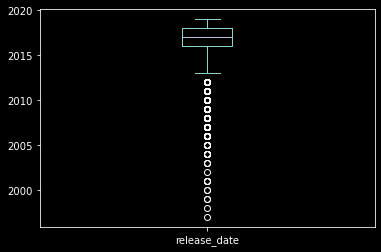

In [14]:
df['release_date'].dt.year.plot(kind='box')

Boxplot has many outliers, but why?

The lower values are due to Valves own games and the few games that were allowed on early that were quite rare

In [15]:
df.sort_values(by='release_year').head(5)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,average_playtime,median_playtime,owners,price,windows,mac,linux,owners_low,owners_high,release_year
2685,Carmageddon Max Pack,1997-06-30,True,Stainless Games Ltd,THQ Nordic,windows,0,Single-player;Multi-player;Steam Trading Cards,Action;Indie;Racing,Racing;Action;Classic,...,13,13,50000-100000,5.99,True,False,False,50000,100000,1997
6,Half-Life,1998-11-08,True,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,...,1300,83,5000000-10000000,7.19,True,True,True,5000000,10000000,1998
1,Team Fortress Classic,1999-04-01,True,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,277,62,5000000-10000000,3.99,True,True,True,5000000,10000000,1999
4,Half-Life: Opposing Force,1999-11-01,True,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,624,415,5000000-10000000,3.99,True,True,True,5000000,10000000,1999
5,Ricochet,2000-11-01,True,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,...,175,10,5000000-10000000,3.99,True,True,True,5000000,10000000,2000


# Amount of games per year

<AxesSubplot:>

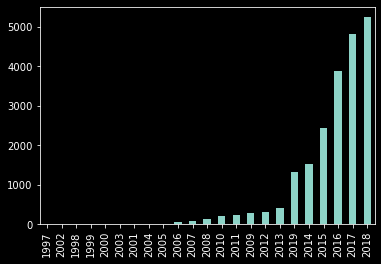

In [16]:
df['release_year'][df['positive_ratings'] > 5].value_counts().sort_values().plot(kind='bar')

# Amount of games per year after 2005

C:\Users\Stijn\AppData\Local\Temp/ipykernel_7872/4157551761.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['release_year'] > 2005][df['positive_ratings'] > 5]['release_year'].value_counts().sort_values().plot(kind='bar')


<AxesSubplot:>

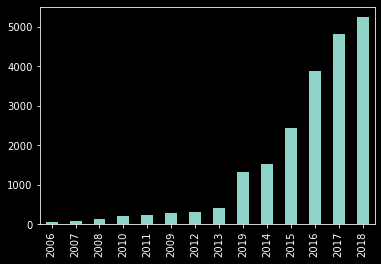

In [17]:
df[df['release_year'] > 2005][df['positive_ratings'] > 5]['release_year'].value_counts().sort_values().plot(kind='bar')

# Amount of games that were played for longer than 30 hours

C:\Users\Stijn\AppData\Local\Temp/ipykernel_7872/3507090343.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['owners_low'] > 50000][df['median_playtime']> 30]['release_year'].value_counts().sort_values().plot(kind='bar')


<AxesSubplot:>

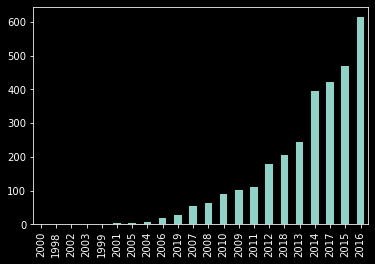

In [18]:
df[df['owners_low'] > 50000][df['median_playtime']> 30]['release_year'].value_counts().sort_values().plot(kind='bar')

In [19]:
df[df['positive_ratings'] > 5]['developer'].value_counts().head(10)

Choice of Games               69
KOEI TECMO GAMES CO., LTD.    61
Ripknot Systems               42
RewindApp                     38
Humongous Entertainment       36
Nikita "Ghost_RUS"            34
For Kids                      32
Hosted Games                  31
EnsenaSoft                    31
MumboJumbo                    29
Name: developer, dtype: int64

In [20]:
df.sort_values('positive_ratings',ascending = False).head(10)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,...,average_playtime,median_playtime,owners,price,windows,mac,linux,owners_low,owners_high,release_year
25,Counter-Strike: Global Offensive,2012-08-21,True,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,...,22494,6502,50000000-100000000,0.00,True,True,True,50000000,100000000,2012
22,Dota 2,2013-07-09,True,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,...,23944,801,100000000-200000000,0.00,True,True,True,100000000,200000000,2013
19,Team Fortress 2,2007-10-10,True,Valve,Valve,windows;mac;linux,0,Multi-player;Cross-Platform Multiplayer;Steam ...,Action;Free to Play,Free to Play;Multiplayer;FPS,...,8495,623,20000000-50000000,0.00,True,True,True,20000000,50000000,2007
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,True,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,...,22938,12434,50000000-100000000,26.99,True,False,False,50000000,100000000,2017
121,Garry's Mod,2006-11-29,True,Facepunch Studios,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Cross-Platfor...,Indie;Simulation,Sandbox;Multiplayer;Funny,...,12422,1875,10000000-20000000,6.99,True,True,True,10000000,20000000,2006
2478,Grand Theft Auto V,2015-04-13,True,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,...,9837,4834,10000000-20000000,24.99,True,False,False,10000000,20000000,2015
1467,PAYDAY 2,2013-08-13,True,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,Co-op;Action;FPS,...,3975,890,10000000-20000000,7.49,True,False,True,10000000,20000000,2013
3362,Unturned,2017-07-07,True,Smartly Dressed Games,Smartly Dressed Games,windows;mac;linux,0,Single-player;Online Multi-Player;Online Co-op...,Action;Adventure;Casual;Free to Play;Indie,Free to Play;Survival;Zombies,...,3248,413,20000000-50000000,0.00,True,True,True,20000000,50000000,2017
1120,Terraria,2011-05-16,True,Re-Logic,Re-Logic,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action;Adventure;Indie;RPG,Sandbox;Adventure;Survival,...,5585,1840,5000000-10000000,6.99,True,True,True,5000000,10000000,2011
21,Left 4 Dead 2,2009-11-19,True,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Co-op;Steam Achieve...,Action,Zombies;Co-op;FPS,...,1615,566,10000000-20000000,7.19,True,True,True,10000000,20000000,2009


In [21]:
series = df[df['positive_ratings'] > 5][medianPlaytimeFilter]['developer'].value_counts()
series.where(lambda x :  0 < x).dropna()

C:\Users\Stijn\AppData\Local\Temp/ipykernel_7872/1183673222.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  series = df[df['positive_ratings'] > 5][medianPlaytimeFilter]['developer'].value_counts()


Valve                                     26
EnsenaSoft                                26
Winged Cloud                              17
Square Enix                               17
Daedalic Entertainment                    17
                                          ..
IMGN.PRO                                   1
Autumn Moon                                1
Lord Kres                                  1
Acido Cinza                                1
Beijing Litchi Culture Media Co., Ltd.     1
Name: developer, Length: 4077, dtype: int64

In [22]:
df[df['positive_ratings'] > 5][medianPlaytimeFilter]['required_age'].value_counts()

C:\Users\Stijn\AppData\Local\Temp/ipykernel_7872/70254092.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['positive_ratings'] > 5][medianPlaytimeFilter]['required_age'].value_counts()


0     5796
18     186
16     116
12      24
7        4
3        3
Name: required_age, dtype: int64